<a href="https://colab.research.google.com/github/alzahra-20/Mec-20F20344/blob/main/Rsnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/test'    # Update with your actual path

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/train/Fake')))
print(len(os.listdir('/content/drive/MyDrive/train/Real')))
print(len(os.listdir('/content/drive/MyDrive/test/Fake1')))
print(len(os.listdir('/content/drive/MyDrive/test/Real')))

506
545
256
264


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 841 images belonging to 2 classes.
Found 210 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
27/27 [==============================] - 531s 19s/step - loss: 2.6465 - accuracy: 0.4923 - val_loss: 0.9033 - val_accuracy: 0.4810
Epoch 2/3
27/27 [==============================] - 288s 11s/step - loss: 0.7599 - accuracy: 0.5077 - val_loss: 0.7216 - val_accuracy: 0.4952
Epoch 3/3
27/27 [==============================] - 286s 11s/step - loss: 0.7228 - accuracy: 0.5493 - val_loss: 0.6958 - val_accuracy: 0.5000


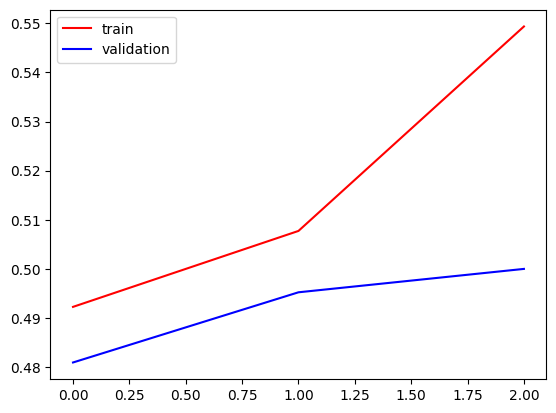

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

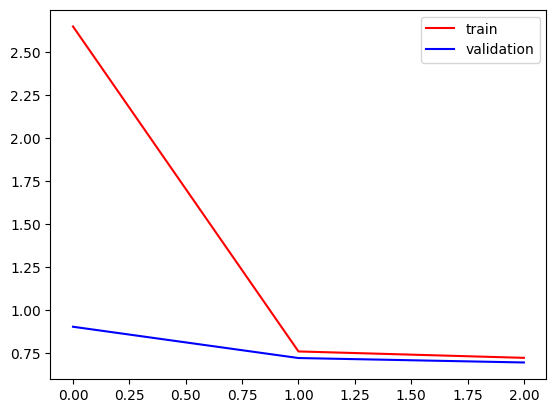

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 520 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

17/17 [==============================] - 151s 9s/step
[[0.63032913]
 [0.45385888]
 [0.49523205]
 [0.52289015]
 [0.36011028]
 [0.6748744 ]
 [0.6031791 ]
 [0.44614765]
 [0.5355752 ]
 [0.36560872]
 [0.5067358 ]
 [0.4346074 ]
 [0.49325198]
 [0.6465159 ]
 [0.3127226 ]
 [0.61938   ]
 [0.5189965 ]
 [0.6268988 ]
 [0.5816442 ]
 [0.5877934 ]
 [0.5648763 ]
 [0.40472057]
 [0.5889782 ]
 [0.6357155 ]
 [0.5214733 ]
 [0.50052714]
 [0.71100694]
 [0.51762515]
 [0.44183254]
 [0.48490846]
 [0.50120306]
 [0.52462846]
 [0.48864087]
 [0.53051156]
 [0.49047533]
 [0.28099015]
 [0.62745565]
 [0.49293414]
 [0.572304  ]
 [0.5275654 ]
 [0.60692894]
 [0.6865504 ]
 [0.49493513]
 [0.56144303]
 [0.4954105 ]
 [0.58957   ]
 [0.51909065]
 [0.5727825 ]
 [0.73823214]
 [0.5542128 ]
 [0.4812263 ]
 [0.6485214 ]
 [0.583472  ]
 [0.7478959 ]
 [0.45730114]
 [0.5130809 ]
 [0.91082335]
 [0.6399505 ]
 [0.5300348 ]
 [0.65155625]
 [0.36357942]
 [0.5084489 ]
 [0.56220484]
 [0.4533048 ]
 [0.52867466]
 [0.60888714]
 [0.60530216]
 [0.6397

In [13]:
len(predictions)

520

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 77 179]
 [ 85 179]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.30      0.37       256
           1       0.50      0.68      0.58       264

    accuracy                           0.49       520
   macro avg       0.49      0.49      0.47       520
weighted avg       0.49      0.49      0.47       520

